<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<h1>Advanced Data Analytics - Sentiment Analysis Using Neural Networks</h1>
<h2>Part I: Research Question</h2>
<h3>A. Purpose of Analysis</h3>
<h4>1. Research Question</h4>
<p>&nbsp; &nbsp; For this project I will answering the following question: Using natural language
processing techniques, can we predict if a user has enjoyed a movie based on the contents
of their review?</p>
<h4>2. Objectives or Goals</h4>
<p>&nbsp; &nbsp; The goal of this data analysis is to accurately determine the sentiment of a user’s
movie review. I will accomplish this by splitting the movie review data into a training and
testing set, generate a neural network model from the training set, apply the model to the
testing values, and then compare the model’s sentiment predictions to the actual
sentiments of the testing set. From this point, I can evaluate the reliability and accuracy of
the model.</p>
<h4>3. Prescribed Network</h4>
<p>&nbsp; &nbsp; In text classification and language processing, recurrent neural networks (RNN) are
commonly used. This type of network takes the previous input into consideration when
processing some input. Its ability to retain a ‘memory’ of past values makes it well suited
“for data with some kind of sequential structure” such as sentences and text (Raj, 2023).
RNNs are valuable in providing the context that matters when determining the sentiment
nature of a review.</p>

<h2>Part II: Data Preparation</h2>
<h3>B. A Summary of the Data Cleaning Process</h3>
<h4>1. Data Exploration</h4>
<p><i>Presence of Unusual Characters</i>

&nbsp; &nbsp; To detect unusual characters present in reviews, I created a regex sequence of
alphanumeric characters as well as symbols commonly present in English writing such as
‘!’, ‘%’, or ‘-‘. Using this established regex rule, I filtered the data frame based on the ‘Review’
column and discovered only 11 rows containing unusual characters.</p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
# makes tensorflow depreciation warnings quiet [In-Text Citation: (user1315789 & Freeman, 2020)]
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' 
# there are deprecated functions in keras that create warning messages in tensorflow, 
# this disables those warnings [In-Text Citation: (Ghilas BELHADJ & serv-inc, 2016)]
import tensorflow as tf
tf.get_logger().setLevel('ERROR')
from tensorflow.keras.models import Sequential, load_model # type: ignore
from tensorflow.keras.layers import TextVectorization, Dropout, Embedding, GlobalAveragePooling1D, Dense # type: ignore
from tensorflow.keras.callbacks import EarlyStopping # type: ignore
from tensorflow.keras.optimizers import Adam #type: ignore
from keras_tuner import RandomSearch

nltk.download('stopwords')
nltk.download('wordnet')
class text:
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

df = pd.read_csv('imdb_labelled.txt', sep='  \t', header=None, names=['Review', 'Sentiment'], engine='python')

print (text.BOLD + "\n-- Begin Data Analytics --\n" + text.END)

# Analysis Overview
print(text.UNDERLINE + "Data Overview" + text.END)
# unusual characters [In-Text Citation: (Gosavi, 2024)]
english_regex = r"^[a-zA-Z0-9\s.,!?'\"\-/()&$#;:*+%]*$"
# finds cells that don't have english characters [In-Text Citation: (stites & Andy Hayden, 2013)]
print(f"Rows with non-english: {df[~df['Review'].str.contains(english_regex)].shape[0]}")



-- Begin Data Analytics --

Data Overview
Rows with non-english: 11


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tenne\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tenne\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<p>&nbsp; &nbsp; Further analysis of these 11 rows shows symbols like ‘Â’, ‘©’, and ‘¥’ qualify these reviews as
unusual.

<i>Vocabulary Size</i>

&nbsp; &nbsp; I analyzed the vocabulary size of the data set in three different instances. Viewing
the reviews as is, there are 3,074 unique words present. When the data is normalized by
removing stop words and lemmatization, 2,759 unique words remain. Once the data is split
into training and testing data there are 2,380 unique words found in the training set.

</p>

In [2]:
# tokenization
# retains only words and numbers, no symbols [In-Text Citation: (Bobbitt, 2022)]
sentences = df['Review'].str.replace(r'\W', ' ', regex=True)
sentences = [text.lower().split() for text in sentences]

# normalize sentences [In-Text Citation: (Jain, 2024)]
wl = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
meaningful_sentences = []
meaningful_vocab = []
total_vocab = []
# this loop removes stopwords, lemmatizes the words, and makes a sequence of the words
for sentence in sentences:
   meaningful_words = []
   for word in sentence:
      if word not in total_vocab:
         total_vocab.append(word)
      # only retains non-stopwords
      if word not in stop_words:
         # lemmatizes the meaningful words
         lemmatized_word = wl.lemmatize(word)
         meaningful_words.append(lemmatized_word)
         # finds only unique words
         if lemmatized_word not in meaningful_vocab:
            meaningful_vocab.append(lemmatized_word)
   meaningful_sentences.append(meaningful_words)
print(f"Vocab of Words: {len(total_vocab)} words")
print(f"Vocab of Normalized Words: {len(meaningful_vocab)} words")

Vocab of Words: 3074 words
Vocab of Normalized Words: 2759 words


<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<p><i>Word Embedding Length</i>

&nbsp; &nbsp; Word2Vec, a popular library used for word embedding, defaults to using vector size
length of 100 dimensions and suggests “reasonable” alternative vector sizes “are in the
tens to hundreds” (Řehůřek, 2024). Recommendations from other data analysts’ sources
suggest that dimensions beyond 300 result in “diminishing returns” (Tazzyman, n.d.). With
both of these sources in mind, I have decided to use a word embedding length of 200
dimensions.

<i>Statistical Justification for Maximum Sequence Length</i>

&nbsp; &nbsp; The maximum sequence length will be 25. I came to this conclusion by
programmatically counting the amount of words in each sentence after tokenizing and
normalizing the data, then I generated a histogram of the results:
</p>

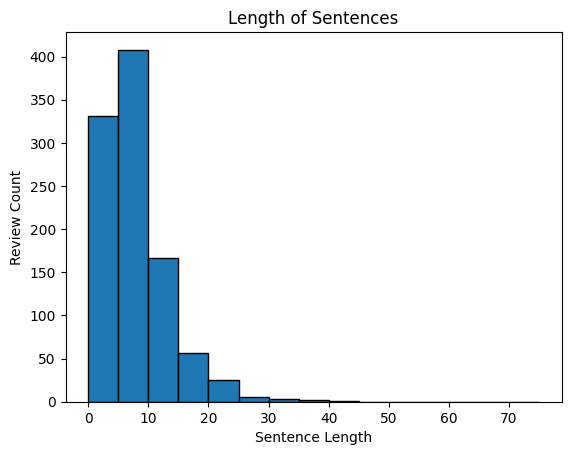

In [3]:
# find max sequence length
normalized_df = pd.DataFrame({
   'Review': map(" ".join, meaningful_sentences),
   'Length': map(len, meaningful_sentences),
   'Sentiment': df['Sentiment']
})
sequence_length = 25
plt.hist(normalized_df['Length'], bins=range(0,80,5), edgecolor='black')
plt.xlabel("Sentence Length")
plt.ylabel("Review Count")
plt.title("Length of Sentences")
plt.show()

<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<p>&nbsp; &nbsp; The graph tails to the right with few sentences having more than 25 words.
Furthermore, I calculated exactly how many sentences have 25 words or less with the
result being 989 sentences.</p>

In [4]:
print(f"Sequence Length: {sum(length <= sequence_length for length in normalized_df['Length'])} sentences have {sequence_length} words or less.")

Sequence Length: 989 sentences have 25 words or less.


<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<p>&nbsp; &nbsp; This sequence length accounts 98.9% of all reviews meaning only 11 reviews will
need to be truncated.</p>
<h4>2. Tokenization</h4>
<p>&nbsp; &nbsp; In NLP models, string data is tokenized to give it a form of structure that algorithms
can understand. This entails removing punctuation, lowercasing all words, and splitting a
string into an array of individual word strings. Following this process, the texts is stripped of
stop words and undergoes lemmatization to normalize and prepare the text for further
processing.

&nbsp; &nbsp; Stop words include common words that don’t provide meaningfulness to the
sentence like the words ‘the’, ‘and’ or ‘of’. The nltk.corpus dictionary of stop words was
used in filtering out these filler words.
The process of lemmatization entails reducing a word to its base form, for example
changing the words ‘loving’, ‘eaten’, and ‘ate’ to ‘love’, ‘eat’, and ‘eat’. While the form of the
word is changed, the meaning is still preserved. I used the WordNetLemmatizer function
from the nltk.stem library to apply this process. Following these processes, words can be
vectorized and embedded.
</p>

In [5]:
# region Data Preparation
print(text.UNDERLINE + "\nData Preparation" + text.END)
print("Proof of Tokenization:")
print(sentences[5])
print("Normalized Data:")
print(meaningful_sentences[5])


Data Preparation
Proof of Tokenization:
['the', 'rest', 'of', 'the', 'movie', 'lacks', 'art', 'charm', 'meaning', 'if', 'it', 's', 'about', 'emptiness', 'it', 'works', 'i', 'guess', 'because', 'it', 's', 'empty']
Normalized Data:
['rest', 'movie', 'lack', 'art', 'charm', 'meaning', 'emptiness', 'work', 'guess', 'empty']


<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<h4>3. Padding Process</h4>
<p>&nbsp; &nbsp; After tokenization and splitting the data, the TextVecorization function from the
tensorflow.keras.layers library is used to vectorize and pad every review. Vectorization is
the process of converting every word into a representative number based on what number
that word is labeled as in the generated vocabulary. The result of this is known as a
sequence. Following this step, the sequences are converted to all the same length through
padding to prevent “inefficient learning or even errors during training” (Sohail, 2024). This
involves adding a reserved number, typically zero, to the beginning or end of the sequence
until it is the desired length. As predetermined in B1, the sequences below a length of 25
are padded with zeroes at the end of the sequence and sequences greater than a length of
25 are truncated.</p>

In [6]:
# split data
train_x, test_x, train_y, test_y = train_test_split(normalized_df['Review'], normalized_df['Sentiment'], test_size=0.2, random_state=101)
print(f"\nTraining Size: {train_x.shape[0]}, Testing Size: {test_x.shape[0]}")
# text vectorization and padding [In-Text Citation: (TensorFlow, 2024)]
vectorize_layer = TextVectorization(
   standardize='lower_and_strip_punctuation', 
   split='whitespace', 
   output_mode='int',
   output_sequence_length=sequence_length,
   )
# create a vocabulary based on training data
vectorize_layer.adapt(train_x)
vocab_size = vectorize_layer.vocabulary_size()
print(f"Vocabulary from Training Data: {vocab_size} words")
train_vector = vectorize_layer(train_x)
test_vector = vectorize_layer(test_x)
print("\nExample of Padded Sequence:")
tf.print(train_vector[0], summarize=-1)


Training Size: 800, Testing Size: 200
Vocabulary from Training Data: 2380 words

Example of Padded Sequence:
[2151 1028 1992 72 2237 314 1350 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<h4>4. Categories of Sentiment</h4>
<p>&nbsp; &nbsp; The provided data source contains two categories of sentiment: 0 represents a
review with negative sentiment and a review labeled 1 has a positive sentiment.
Considering this, the final dense layer of the network will use a sigmoid activation function
as “the output is always between 0 and 1” (Saeed, 2021).</p>
<h4>5. Steps to Prepare the Data</h4>
<p>&nbsp; &nbsp; As explained in the prior sections the data was prepared through tokenization,
vectorization and by splitting the data into training and testing sets.

&nbsp; &nbsp; The tokenization process began by removing all non-alpha-numeric characters with
a regex statement followed by converting all words to a lowercase as well as turning every
review into an array of strings. Next, I removed stop words and lemmatized the remaining words with the goal of
creating a more effective and efficient neural network.

&nbsp; &nbsp; Before vectorization of the text can occur, the data is split into a training and testing
set. This is necessary because the text vectorization function generates a vocabulary
based on the input data and reserves a value for unknown words. Realistically, the neural
network will not know every word of a data set it is predicting which is why the vocabulary
must come only from the training data. When vectorization is applied to the testing set,
there is a chance words will be marked as unknown to simulate how the model will behave
with data containing new words. 800 or 80% of the reviews are in the training set and 200 or
20% of the reviews are for testing. This also includes separating the sentiment values from
the reviews itself to act as the dependent value in training and testing.

&nbsp; &nbsp; Next, the text is vectorized into a numeric sequence based on the generated
vocabulary and padded to a length of 25 values. The vocabulary for this process is adapted
from the training data and vectorization is applied to both the training and testing sets.</p>

<h4>6. Prepared Data Set</h4>
<p>&nbsp; &nbsp; The prepared data is split into four different data sets being separated based on
training and testing values as well as independent (review) and dependent (sentiment)
values. These can be found in the CSV files labeled ‘train_x.csv’, ‘train_y.csv’, ‘test_x.csv’,
and ‘test_y.csv’.</p>


In [7]:
training_x = pd.DataFrame(data=train_vector)
training_x.to_csv('train_x.csv', index=False)
testing_x = pd.DataFrame(data=test_vector)
testing_x.to_csv('test_x.csv', index=False)
training_y = pd.DataFrame(data=train_y)
training_y.to_csv('train_y.csv', index=False)
testing_y = pd.DataFrame(data=test_y)
testing_y.to_csv('test_y.csv', index=False)

<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<h2>Part III: Network Architecture</h2>
<h3>C. Descriptive Explanation of Network Architecture</h3>
<h4>1. Model Summary</h4>

In [9]:
# region Build Model
def build_model(hp):
   """
   build model: runs the designated amount of tests to find the most accurate neural network
   """
   model = Sequential()
   model.add(Embedding(input_dim=vocab_size, output_dim=dimensions)) # embedding layer
   model.add(GlobalAveragePooling1D())
   model.add(Dropout(rate=0.2, seed=101))
   # picks a random amount of layers to add
   for i in range(hp.Int('n_layers', 1, 5)):
      model.add(Dense(hp.Int(f'dense_{i}',min_value=32,max_value=512,step=32), activation='relu'))
   model.add(Dense(1, activation='sigmoid'))
   model.compile(optimizer=Adam(learning_rate=hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])),
               loss='binary_crossentropy',
               metrics=['accuracy'])
   return model
print(text.UNDERLINE + "\nBuilding the Model" + text.END)
# early stopping [In-Text Citation: (Bhattbhatt, 2024)]
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
dimensions = 200
# switch to enable optimizing or to just run the best configured model,
# only enable if you have at least ~30 mins to spare
optimize = False
model_filename = 'Saved_Model.keras'
metrics_filename = 'Saved_Metrics.csv'
model = None
metrics_df = None
# checks if a generated model exists and loads it [In-Text Citation: (Anis, 2021)]
if os.path.isfile(model_filename) and os.path.isfile(metrics_filename):
   model = load_model(model_filename)
   # loads save history values for graphing
   metrics_df = pd.read_csv(metrics_filename)
else:
   if optimize:
      # 100 trials with 5 executions took ~30 mins to run
      tuner = RandomSearch(
         build_model,
         objective='val_accuracy',
         max_trials=100,
         executions_per_trial=5,
         directory='tuning_dir',
         project_name='my_model'
      )
      # Start the search for the best hyperparameters [In-Text Citation: (Rodrigo_V, 2021)]
      tuner.search(train_vector, train_y, epochs=20, batch_size=32, validation_data=(test_vector, test_y), callbacks=[early_stopping])
      # get best hyperparameters, not best model [In-Text Citation: (Kashyap, 2024)]
      best_hp = tuner.get_best_hyperparameters()[0]
      model = tuner.hypermodel.build(best_hp)
   else:
      # prebuilt model with best parameters from tuning [In-Text Citation: (Sharmasaravanan, 2024)]
      model = Sequential()
      model.add(Embedding(input_dim=vocab_size, output_dim=dimensions)) # embedding layer
      model.add(GlobalAveragePooling1D())
      model.add(Dropout(rate=0.2, seed=101))
      model.add(Dense(32, activation = "relu"))
      model.add(Dense(128, activation = "relu"))
      model.add(Dense(288, activation = "relu"))
      model.add(Dense(256, activation = "relu"))
      model.add(Dense(1, activation ='sigmoid'))  # output layer sigmoid b/c it is binary
      model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
   history = model.fit(train_vector, train_y, epochs=20, batch_size=32, validation_data=(test_vector, test_y), callbacks=[early_stopping])
   # saves history values so they can be loaded along with the saved model
   metrics_df = pd.DataFrame({
      'Accuracy': history.history['accuracy'],
      'Val_Accuracy': history.history['val_accuracy'],
      'Loss': history.history['loss'],
      'Val_Loss': history.history['val_loss'],
      'Epoch': range(1, len(history.epoch)+1),
      'Early_Stop': early_stopping.stopped_epoch - 1, # the -1 accounts for the patience of 3
   })
   metrics_df.to_csv(metrics_filename, index=False)
   # saves the model
   model.save(model_filename)
print()
print(model.summary())


Building the Model



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (32, 25, 200)          │       476,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (32, 200)              │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (32, 200)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 32)               │         6,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 128)              │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (32, 288)              │        37,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (32, 256)              │        73,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (32, 1)                │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,794,149 (6.84 MB)

 Trainable params: 598,049 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,196,100 (4.56 MB)

None


<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<h4>2. Network Architecture</h4>
<p>&nbsp; &nbsp; There are eight different layers in the network with 1,794,149 total parameters. I
have decided on these layers in a combination of research and running an algorithm to help
tune for the best model.

&nbsp; &nbsp; The first layer is an embedding layer with an input size of 2,380(vocabulary size) and
a dimension or output size of 200 which multiplies out to 476,000 parameters to start with.
This layer converts every sequence value into its own array of values to give it weight.
Words with similar meanings will have similar weights which helps the neural network learn
about connections and relationships between words.

&nbsp; &nbsp; The second layer is the global average pooling. This takes the three-dimensional
output created by embedding and converts it into a two-dimensional output which can be
used in the dense layers. The parameter values for this and the following layer are zero as
they are more akin to formatting than data processing. After that dimensional conversion,
the values are processed in the dropout layer where 20% of nodes are disabled for further
layer processing in the current iteration to help with overfitting.

&nbsp; &nbsp; From here the values are sent through a series of four dense layers with ReLU
activation functions. Dense layers take data from the previous layer, passes it through its
neurons (units) and calculates weights and biases from this data that help estimate
sentiment. The number of dense layers and the unit values of 32, 128, 288, and 256 were
determined using the RandomSearch function from the keras-tuner library. Parameters in
these layers waiver from 6,432 to 4,222, then 37,152 to 73,984.

&nbsp; &nbsp; The last layer is also dense layer with a sigmoid activation function and one neuron.
This formats the results so they can be compared to the training and testing sentiment
values and has 257 parameters.</p>

<h4>3. Hyperparameters</h4>
<p><i>Activation Functions</i>

&nbsp; &nbsp; For four of the dense layers I used the ReLU activation function as it is
“computationally efficient” in neural network building and highly recommended (Dremio,
n.d.). The final dense layer uses a sigmoid activation function because it outputs values
that are zero or one which makes the data comparable to the sentiment already provided in
the data set.

<i>Number of Nodes Per Layer</i>

&nbsp; &nbsp; The number of nodes, or units, per layer was determined by tuning the model
through keras-tuner’s RandomSearch function. I ran one hundred trials with each trial
being executed five times. The best model based on validation accuracy had a score of
0.822 with four dense layers at 32, 128, 288, and 256 units.

<i>Loss Function</i>

&nbsp; &nbsp; Binary cross entropy is a loss function that compares actual values to values
predicted by the model and penalizes predictions that are confidently wrong (Shah, 2023).
This method is specifically designed for binary classification problems such as the
predicting positive versus negative sentiment in this analysis.

<i>Optimizer</i>

&nbsp; &nbsp; Since many tests were run to determine the optimal layering of the networkan
optimizer that was quick yet viable was necessary which is why I selected the Adam
optimizer. This algorithm is adaptable which can “speed up learning”, is efficient in memory
usage and less sensitive to the other hyperparameters selected (Tuychlev, 2024). The
learning rate of this optimizer was also determined by model tuning where rates of 0.01,
0.001, 0.0001 were tested and 0.0001 was selected.

<i>Stopping Criteria</i>

&nbsp; &nbsp; I used an early stopping criterion centered on validation loss with a patience of
three. This stops the model iteration when validation loss starts to increase to prevent
overfitting. It then selects the epoch with the best weights before overfitting began to occur.
If the model is not stopped, it will run for 20 epochs.

<i>Evaluation Metric</i>

&nbsp; &nbsp; The accuracy metric was selected because it “calculates how often predictions
equal [the actual] labels”(Team, n.d.). It is suitable for a binary classification analysis such
as this and complements the binary cross entropy loss function selected.

<h2>Part IV: Model Evaluation</h2>
<h3>D. Model Training Process Evaluation and Outcomes</h3>
<h4>1. Stopping Criteria</h4>
<p>&nbsp; &nbsp; In creating a reliable model, the epoch value should not be too small because the
model will not be able to learn in a short number of cycles and it should not be too big
because it risks overfitting training data. For this model, I have selected to let it run for at
most 20 epochs. Additionally, a smaller count of epochs are used for this network because
the training set is comprised of only 800 reviews which, in terms of data collection and
training, is on the smaller side

&nbsp; &nbsp; When the model starts to show signs of overfitting, such as the validation loss
increasing, the early stopping criteria will prevent the model from generating more epochs.
This helps preserve accuracy and prevent higher amounts of loss in predictability. Enabling
the ‘restore_best_weights’ parameter in the EarlyStopping function of the
tensorflow.keras.callback library will also select the best weighted epoch as the one used
for the network.

&nbsp; &nbsp; Here is a picture of the final listed training epoch:

&nbsp; <img src="Images/final epoch.png" alt="Visual of Final Epoch" />

&nbsp; &nbsp; Since early stopping occurred in the network, this is a picture of the epoch with the
best weights selected as the ‘final epoch’ by early stopping:

&nbsp; <img src="Images/actual epoch.png" alt="Visual of Actual Epoch" /> </p>
<h4>2. Fitness</h4>
<p>&nbsp; &nbsp; In an ideal neural network, the validation accuracy value is high and the validation
loss value is low. Evaluating the model with testing data shows it having a predictive
accuracy of 82% which is significant enough to say the model is not randomly guessing
values, it is considering the input data in its predictions. The loss metric considers the
difference between predicted and actual values and scores how confident the model is in
its predictions. In this aspect, the model scored somewhat high at 0.4125.

&nbsp; &nbsp; Another element of consideration in the fitness of the model is whether it is
overfitting to the training data. This occurs when a model trains with a particular set of data
too well leading to poorer predictions on unseen data. I mitigated the possibility of
overfitting by stopping the model early when validation loss began to increase and by
including a dropout layer to the neural network which forces the neurons to be more
flexible in training.

&nbsp; &nbsp; All in all, the model is a good fit for the data set. There is room for improvement
minimizing loss and increasing accuracy, but the network is still viably useful.

<img src="Images/model evaluation.png" alt="Visual of Model Evaluation" /></p>
<h4>3. Training Process</h4>
<p>&nbsp; &nbsp; As mentioned in C3, the evaluation metric for this model is accuracy.</p>


Model Evaluation
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7879 - loss: 0.4583  
Test Accuracy: 0.8199999928474426
Test Loss: 0.41247498989105225


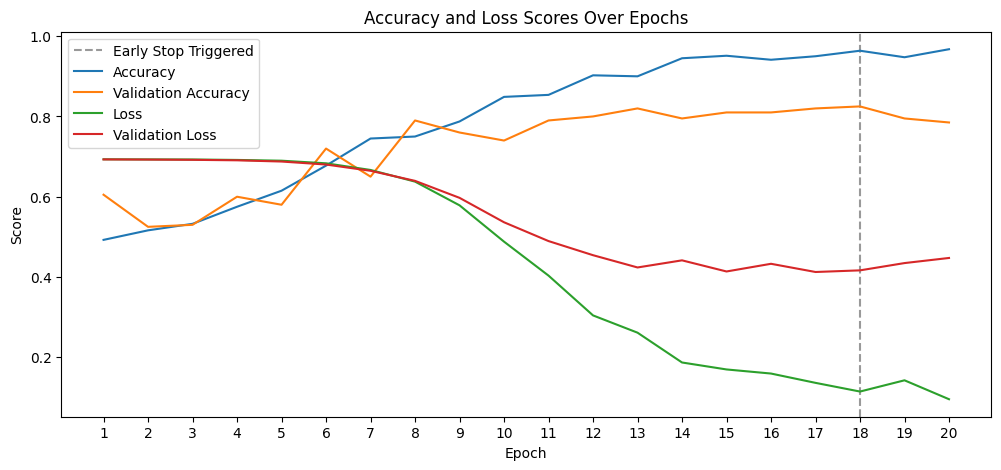

In [10]:
# region Evaluating Model 
print("\nModel Evaluation")
test_loss, test_acc = model.evaluate(test_vector, test_y)
print(f'Test Accuracy: {test_acc}')
print(f"Test Loss: {test_loss}")

plt.figure(figsize=(12, 5))
plt.xticks(range(1, len(metrics_df['Epoch'])+1))
if metrics_df['Early_Stop'][0] > 0: 
   plt.axvline(x=metrics_df['Early_Stop'][0], color="0.6", linestyle='dashed', label='Early Stop Triggered')
plt.plot(metrics_df['Epoch'], metrics_df['Accuracy'], label='Accuracy')
plt.plot(metrics_df['Epoch'], metrics_df['Val_Accuracy'], label='Validation Accuracy')
plt.plot(metrics_df['Epoch'], metrics_df['Loss'], label='Loss')
plt.plot(metrics_df['Epoch'], metrics_df['Val_Loss'], label='Validation Loss')
plt.title('Accuracy and Loss Scores Over Epochs')
plt.ylabel('Score')
plt.xlabel('Epoch')
plt.legend()
plt.show()

<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<h4>4. Predictive Accuracy</h4>
<p>&nbsp; &nbsp; The accuracy of the network on training data was 94.09% for the selected epoch.
This could be a sign of overfitting, but the validation accuracy is only a little behind in
prediction scoring. As mentioned in D2, this accuracy was rated at 82% meaning 166
testing reviews of the 200 were predicted correctly. With binary values, an accuracy of
around 50% indicates a model that is no better than guessing, but with an accuracy as high
as it is the model can be considered moderately-to-highly predictive.</p>

<h2>Part V: Summary and Recommendations</h2>
<h3>E. Code</h3>
<p>&nbsp; &nbsp; The model is saved under the file ‘Saved_Model.keras’ and the relevant history
variables generated by fitting the model are saved under the ‘Saved_Metrics.csv’ file. I have
saved these metrics for consistent graphing purposes.</p>
<h3>F. Functionality</h3>
<p>&nbsp; &nbsp; As previously stated, I believe the neural network to be quite functional. Room for
improvement is always possible given that the validation accuracy could be higher and the
validation loss could be lower, but this network isn’t without some significance. A user’s
opinion about a movie can be predicted 82% of the time.

&nbsp; &nbsp; While tuning did help optimize the model’s scores against unseen data, I ultimately
decided what kind of layers should be tested in the tuner. This still leaves room for the
possibility of a better network in a combination of layer types not tested. Furthermore, I
also experimented with the possibility of not including a dropout layer which always
resulted in a better model discovered by the tuner. Regardless, I have included a dropout
layer to mitigate issues of overfitting while settling for less validation accuracy. Other
instances of tuning included separately testing the impact of a RNN layer, a LSTM layer, and
replacing the GlobalAveragePooling1D with a Flatten layer which all resulted in worse
scores.</p>
<h3>G. Recommendation</h3>
<p>&nbsp; &nbsp; The biggest recommendation I can give is to gather more movie review data. A larger
data set could greatly increase the model’s ability to learn, and in turn, even increase
prediction accuracy. There is also room for improvement in the layering of the neural
network, running more trials, testing different combinations of layers and activation
functions and tweaking the optimizer’s learning rate are all activities that could benefit the
model.

&nbsp; &nbsp; Given that the model is decently accurate, analysts could use the model as it
currently is to uncover what movies users don’t like and why they don’t like them by
checking weights and frequency of vocabulary against sentiment. Moviemakers and
marketing studios can create and promote films they believe are more likely to be enjoyed
by audiences.</p>

<h2>Part VI: Reporting</h2>
<h3>H. Sources For Third-Party Code</h3>
<p>Anis, A. (2021, February 3). Saving and loading models in TensorFlow — why it is important
and how to do it. KDnuggets. <a href="https://www.kdnuggets.com/2021/02/saving-loading-models-tensorflow.html">https://www.kdnuggets.com/2021/02/saving-loading-models-tensorflow.html</a>

Bhattbhatt, V. (2024, January 10). A Step-by-Step guide to early stopping in TensorFlow and
PyTorch. Medium. https://medium.com/@vrunda.bhattbhatt/a-step-by-step-guide-to-early-stopping-in-tensorflow-and-pytorch-59c1e3d0e376

Bobbitt, Z. (2022, October 10). Pandas: How to Remove Special Characters from Column.
Statology. https://www.statology.org/pandas-remove-special-characters/

Dutta, S. (2024, April 22). Hyperparameter Tuning with Keras Tuner and TensorFlow.
Medium. https://medium.com/@sanjay_dutta/hyperparameter-tuning-with-keras-tuner-and-tensorflow-48ab5ea69cc5

Ghilas BELHADJ & serv-inc. (2016, March 10). Disable Tensorflow debugging information.
Stack Overflow. https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information

Gosavi, R. (2024, August 7). Filtering Non-English Characters from Datasets in Databricks.
Medium. https://medium.com/@rahulgosavi.94/filtering-non-english-characters-from-datasets-in-databricks-a35fcec3f576

Jain, A. (2024, February 2). All about Tokenization, Stop words, Stemming and
Lemmatization in NLP. Medium. https://medium.com/@abhishekjainindore24/all-about-tokenization-stop-words-stemming-and-lemmatization-in-nlp-1620ffaf0f87

Kashyap, P. (2024, November 2). Mastering Hyperparameter Tuning for Neural Networks
with Keras Tuner. Medium. https://medium.com/@piyushkashyap045/mastering-hyperparameter-tuning-for-neural-networks-with-keras-tuner-c0b64d549188

Rodrigo_V. (2021, May 14). Tuning hyperparameters with Keras return different results
depending on the method used. Stack Overflow.
https://stackoverflow.com/questions/67533492/tuning-hyperparameters-with-keras-return-different-results-depending-on-the-meth

Sharmasaravanan. (2024, October 8). Recurrent neural networks (RNN) using TensorFlow:
simple RNNs, stacked RNNs, and bidirectional RNNs. Medium.
https://sharmasaravanan.medium.com/recurrent-neural-networks-rnn-using-tensorflow-simple-rnns-stacked-rnns-and-bidirectional-rnns-1ffba776d9e1

stites & Andy Hayden. (2013, June 13). Search for “does-not-contain” on a DataFrame in
pandas. Stack Overflow. https://stackoverflow.com/questions/17097643/search-for-does-not-contain-on-a-dataframe-in-pandas

TensorFlow. (2024, June 7). tf.keras.layers.TextVectorization.
https://www.tensorflow.org/api_docs/python/tf/keras/layers/TextVectorization

user1315789 & Freeman. (2020, December 15). What does this tensorflow message
mean? Any side effect? Was the installation successful? Stack Overflow.
https://stackoverflow.com/questions/65298241/what-does-this-tensorflow-message-mean-any-side-effect-was-the-installation-su</p>
<h3>I. Sources</h3>
<p>Dremio. (n.d.). RELU Activation Function | Dremio. <a href="https://www.dremio.com/wiki/relu-activation-function/">https://www.dremio.com/wiki/relu-activation-function/</a>

Raj, P. (2023, December 6). Understanding Recurrent Neural Networks (RNN) — NLP.
Medium. https://medium.com/@praveenraj.gowd/understanding-recurrent-neural-networks-rnn-nlp-e2f4cae03a4f

Řehůřek, R. (2024, August 10). Gensim: topic modelling for humans. Gensim.
https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html

Saeed, M. (2021, August 18). A Gentle Introduction To Sigmoid Function. Machine Learning
Mastery. https://machinelearningmastery.com/a-gentle-introduction-to-sigmoid-function/

Shah, D. (2023, August 16). Understanding Binary Cross-Entropy and Log Loss for Effective
Model Monitoring. Coralogix. https://coralogix.com/ai-blog/understanding-binary-cross-entropy-and-log-loss-for-effective-model-monitoring/

Sohail, S. (2024, November 2). Understanding padding in NLP: types and when to use
them. Medium. https://saadsohail5104.medium.com/understanding-padding-in-nlp-types-and-when-to-use-them-bacae6cae401

Tazzyman, S. (n.d.). Neural Network models. NLP-guidance. https://moj-analytical-services.github.io/NLP-guidance/NNmodels.html

Team, K. (n.d.). Keras documentation: Accuracy metrics. Keras.
https://keras.io/api/metrics/accuracy_metrics/

Tuychlev, B. (2024, August 29). Adam Optimizer Tutorial: Intuition and Implementation in
Python. DataCamp. https://www.datacamp.com/tutorial/adam-optimizer-tutorial